<img src="../../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

## Quantum Entanglement and Teleportation

In [87]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, IBMQ, execute
from qiskit.providers.aer import noise
# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [93]:
IBMQ.load_accounts()
backend = IBMQ.get_backend('ibmq_16_melbourne')
backend_sim = Aer.get_backend('qasm_simulator')

/Users/talexander/anaconda3/envs/qiskit-test/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqprovider.py:272: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


## Introduction

In this entanglement tutorial, we will introduce you to the quantum concept of entanglement, in particular, the maximally entangled quantum state $|\psi\rangle = (|00\rangle + |11\rangle)$. We will create this entangled state on a real quantum device.

## Entanglement<a id='entanglement'></a>

Entanglement is one of the properties that grants quantum computing its power to perform certain calculations quicker than classical algorithms.

We believe that if you can grasp the following two Principles, you will have a good start: 
1. A physical system in a definite state can still behave randomly.
2. Two systems that are too far apart to influence each other can nevertheless behave in ways that, though individually random, are somehow strongly correlated.

The core idea behind the second Principle is *entanglement*. Upon reading the Principle, one might be inclined to think that entanglement is simply strong correlation between two entitities -- but entanglement goes well beyond mere perfect (classical) correlation. If you and I read the same paper, we will have learned the same information. If a third person comes along and reads the same paper they <i>also</i> will have learned this information. All three persons in this case are perfectly correlated, and they will remain correlated even if they are separated from each other. 

The situation with quantum entanglement is a bit more subtle. In the quantum world, you and I could read the same quantum paper, and yet we will not learn what information is actually contained in the paper until we get together and share our information. However, when we are together, we find that we can unlock more information from the paper than we initially thought possible. Thus, quantum entanglement goes much further than perfect correlation.

To demonstrate this, we will define the controlled-NOT (CNOT) gate and the composition of two systems. The convention we use Qiskit is to label states by writing the first qubit's name in the rightmost position, thereby allowing us to easily convert from binary to decimal. As a result, we define the tensor product between operators $q_0$ and $q_1$ by $q_1\otimes q_0$. 

Taking $q_0$ as the control and $q_1$ as the target, the CNOT with this representation is given by

$$ CNOT =\begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\0& 0& 1 & 0\\0 & 1 & 0 & 0 \end{pmatrix},$$

which is non-standard in the quantum community, but more easily connects to classical computing, where the least significant bit (LSB) is typically on the right. An entangled state of the two qubits can be made via an $H$ gate on the control qubit, followed by the CNOT gate. This generates a particular maximally entangled two-qubit state known as a Bell state, named after John Stewart Bell ([learn more about Bell and his contributions to quantum physics and entanglement](https://en.wikipedia.org/wiki/John_Stewart_Bell)). 


To explore this, we can prepare an entangled state of two qubits, and then ask questions about the qubit states. The questions we can ask are:
* What is the state of the first qubit in the standard basis?
* What is the state of the first qubit in the superposition basis?
* What is the state of the second qubit in the standard basis?
* What is the state of the second qubit in the superposition basis?
* What is the state of both qubits in the standard basis?
* what is the state of both qubits in the superposition basis?

Below is a program to create an initial Bell state.

In [7]:
# Creating registers
q2 = QuantumRegister(2)
c1 = ClassicalRegister(1)
c2 = ClassicalRegister(2)

# quantum circuit to make an entangled bell state 
bell = QuantumCircuit(q2)
bell.h(q2[0])
bell.cx(q2[0], q2[1])

Even though the physical measurement basis of our device are constrained to the standard basis. We can apply a sequence of gates to our qubits to rotate the qubit state such that it is mathematically equivalent to measuring in a different basis.

For example consider the measurement of the state $|0>$ in the superposition, or bell basis $\{|+>, |->\}$. We wish to measure our Bell circuit $U_{bell}$ operation on the ground state, $|0>$. The desired measurement propabilities we wish to obtain are therefore

$p_+ = |<+|U_{bell}|0>|^2$ and $p_- = |<-|U_{bell}|0>|^2$

However, we only have access to the measurement projectors $\{|0>, |1>\}$ on our device. But if we insert the proper rotations we prior to measurement of our qubits we can get around this. In this case we apply hadamards prior to measurement.

$p_+ = |<+|U_{bell}|0>|^2=|<0|H U_{bell}|0>|^2$ and $p_- = |<-|U_{bell}|0>|^2 = |<0|H U_{bell}|0>|^2 $

Which allows us in general to measure any desired basis.

<span class="badge badge-primary">Exercise 2.0</span> Create circuits that measure in the basis `IZ`, `IX`, `ZI`, `XI`, `ZZ` and `XX`. Name these circuits `bell##`.

Note that the `I` corresponds to no measure on the given qubit, `Z` is the standard computational basis and `X` is the superposition basis.

In [ ]:
# quantum circuit to measure q0 in the standard basis
measureIZ = QuantumCircuit(q2, c1)
measureIZ.measure(q2[0], c1[0])
bellIZ = bell+measureIZ

# quantum circuit to measure q0 in the superposition basis 
measureIX = QuantumCircuit(q2, c1)
measureIX.h(q2[0])
measureIX.measure(q2[0], c1[0])
bellIX = bell+measureIX

# quantum circuit to measure q1 in the standard basis
measureZI = QuantumCircuit(q2, c1)
measureZI.measure(q2[1], c1[0])
bellZI = bell+measureZI

# quantum circuit to measure q1 in the superposition basis 
measureXI = QuantumCircuit(q2, c1)
measureXI.h(q2[1])
measureXI.measure(q2[1], c1[0])
bellXI = bell+measureXI

# quantum circuit to measure q in the standard basis 
measureZZ = QuantumCircuit(q2, c2)
measureZZ.measure(q2[0], c2[0])
measureZZ.measure(q2[1], c2[1])
bellZZ = bell+measureZZ

# quantum circuit to measure q in the superposition basis 
measureXX = QuantumCircuit(q2, c2)
measureXX.h(q2[0])
measureXX.h(q2[1])
measureXX.measure(q2[0], c2[0])
measureXX.measure(q2[1], c2[1])
bellXX = bell+measureXX

In [ ]:
# bellIZ = pass 
# bellIX = pass 
# bellZI = pass 
# bellXI = pass 
# bellZZ = pass 
# bellXX = pass 

Now we'll exam the circuits you created

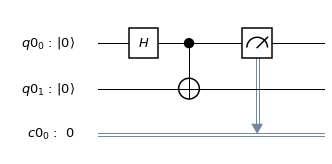

In [8]:
bellIZ.draw(output='mpl')

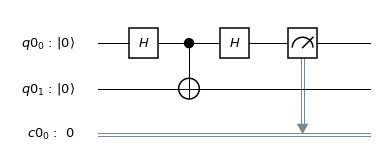

In [9]:
bellIX.draw(output='mpl')

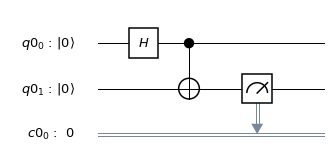

In [10]:
bellZI.draw(output='mpl')

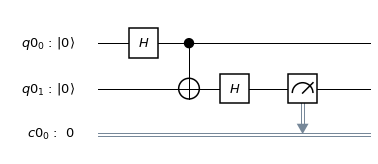

In [11]:
bellXI.draw(output='mpl')

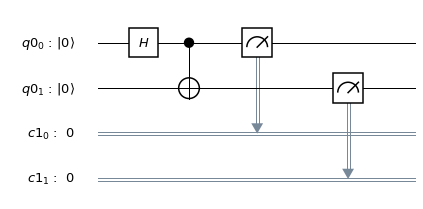

In [12]:
bellZZ.draw(output='mpl')

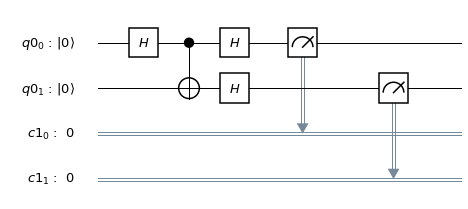

In [13]:
bellXX.draw(output='mpl')

Let's begin by running just the first two questions, looking at the results of the first qubit ($q_0$) using a computational and then a superposition measurement.

<span class="badge badge-primary">Exercise 2.1</span> Run all of the circuits together on `backend_sim` and get a single `result` object.

In [44]:
circuits = [bellIZ,bellIX,bellZI,bellXI,bellZZ,bellXX]
job = execute(circuits, backend_sim)
result = job.result()

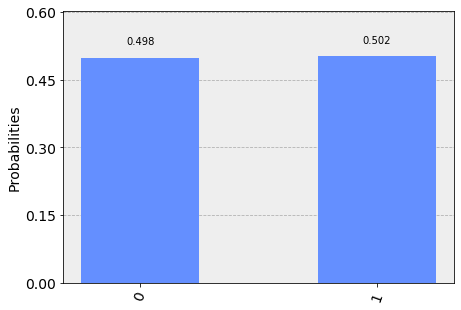

In [16]:
plot_histogram(result.get_counts(bellIZ))

In [17]:
result.get_counts(bellIZ)

{'0': 510, '1': 514}

We find that the result is random. Half the time $q_0$ is in  $|0\rangle$, and the other half it is in the $|1\rangle$ state. You may wonder whether this is like the superposition from earlier in the tutorial. Maybe the qubit has a perfectly definite state, and we are simply measuring in another basis.  What would you expect if you did the experiment and measured in the superposition basis? Recall we do this by adding an $H$ gate before the measurement...which is exactly what we have checked with the second question.

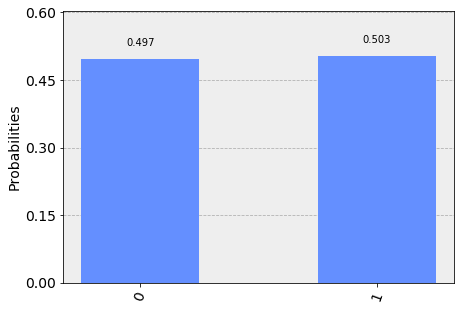

In [18]:
plot_histogram(result.get_counts(bellIX))

In this case, we see that the result is still random, regardless of whether we measure in the computational or the superposition basis. This tells us that we actually know nothing about the first qubit. What about the second qubit, $q_1$? The next lines will run experiments measuring the second qubit in both the computational and superposition bases.

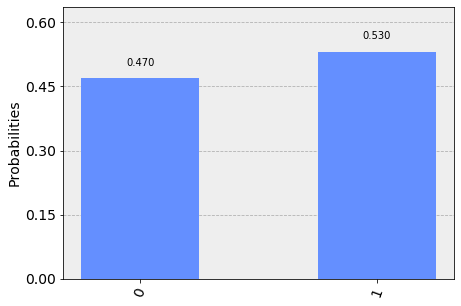

In [19]:
plot_histogram(result.get_counts(bellZI))

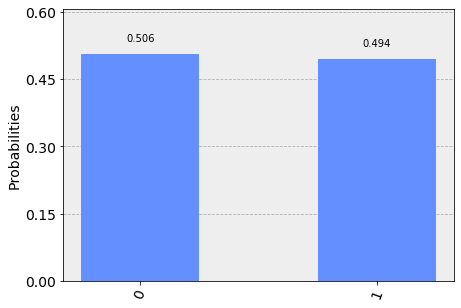

In [20]:
plot_histogram(result.get_counts(bellXI))

Once again, all the experiments give random outcomes. It seems we know nothing about either qubit in our system! In our previous analogy, this is equivalent to two readers separately reading a quantum paper and extracting no information whatsoever from it on their own.

What do you expect, however, when the readers get together?  Below we will measure both in the joint computational basis. 

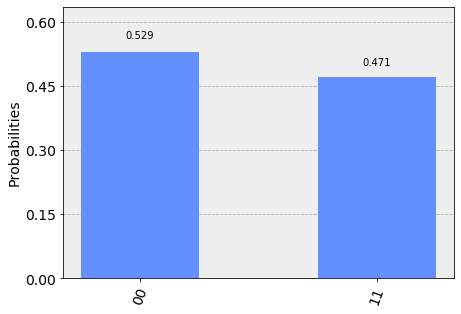

In [21]:
plot_histogram(result.get_counts(bellZZ))

Here we see that with high probability, if $q_0$ is in state 0, $q_1$ will be in 0 as well; the same goes if $q_0$ is in state 1. They are perfectly correlated.

What about if we measure both in the superposition basis?  

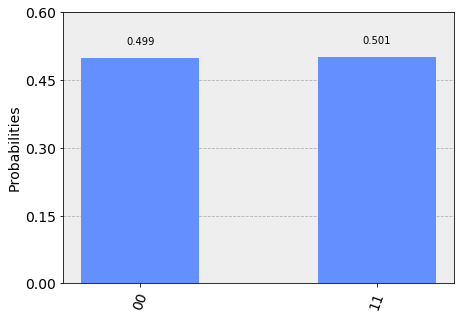

In [22]:
plot_histogram(result.get_counts(bellXX))

Here we see that the system **also** has perfect correlations (accounting for experimental noise). Therefore, if $q_0$ is measured in state $|0\rangle$, we know $q_1$ is in this state as well; likewise, if $q_0$ is measured in state $|+\rangle$, we know $q_1$ is also in this state. These correlations have led to much confusion in science, because any attempt to relate the unusual behavior of quantum entanglement to our everyday experiences is a fruitless endeavor. 

Finally, we need to point out that having correlated outcomes does not necessarily imply that what we are observing is an entangled state. What would we observe, for example, if we prepared half of our shots in the $|00\rangle$ state and half of the shots in the $|11\rangle$ state? Let's have a look

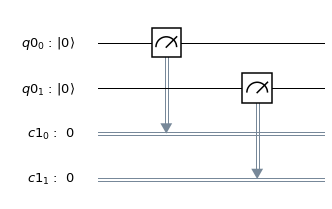

In [23]:
# quantum circuit to make a mixed state 
mixed1 = QuantumCircuit(q2, c2)
mixed2 = QuantumCircuit(q2, c2)
mixed2.x(q2)
mixed1.measure(q2[0], c2[0])
mixed1.measure(q2[1], c2[1])
mixed2.measure(q2[0], c2[0])
mixed2.measure(q2[1], c2[1])

mixed1.draw(output='mpl')

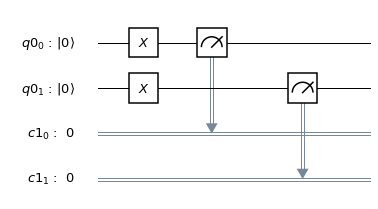

In [24]:
mixed2.draw(output='mpl')

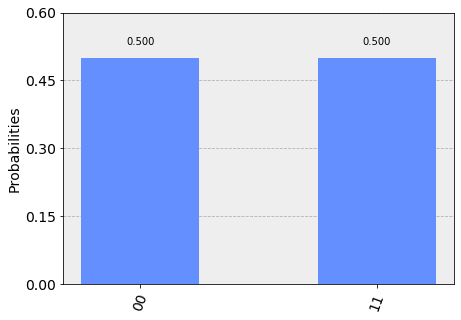

In [43]:
mixed_state = [mixed1,mixed2]
job = execute(mixed_state, backend_sim)
mixed_result = job.result()

counts1 = mixed_result.get_counts(mixed_state[0])
counts2 = mixed_result.get_counts(mixed_state[1])

from collections import Counter
ground = Counter(counts1)
excited = Counter(counts2)
plot_histogram(ground+excited)

We do see the same kind of correlation indeed as we observed in the "bell_measureZZ" circuit. But we know this is not an entangled state! All we have done is leave the qubits in their ground state for some of the shots and flip both qubits for some of the shots. This is called a mixed state and it is a classical state.

<span class="badge badge-primary">Exercise 2.2</span> What would happen if we measured this mixed state in the superposition basis? Try this out yourself with a simulator.

In [31]:
# quantum circuit to make a mixed state 
super_mixed1 = QuantumCircuit(q2, c2)
super_mixed2 = QuantumCircuit(q2, c2)
super_mixed2.x(q2)
super_mixed2.x(q2)
super_mixed1.x(q2)
super_mixed1.measure(q2[0], c2[0])
super_mixed1.measure(q2[1], c2[1])
super_mixed2.measure(q2[0], c2[0])
super_mixed2.measure(q2[1], c2[1])

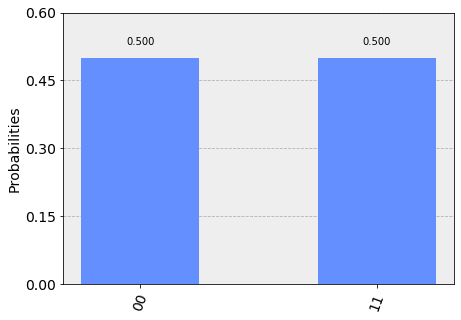

In [32]:
super_mixed_state = [super_mixed1,super_mixed2]
job = execute(super_mixed_state, backend_sim)
result = job.result()

super_counts1 = result.get_counts(super_mixed_state[0])
super_counts2 = result.get_counts(super_mixed_state[1])

from collections import Counter
super_ground = Counter(super_counts1)
super_excited = Counter(super_counts2)
plot_histogram(super_ground+super_excited)

In this case we observe no difference between the two basis. Measuring in the superposition basis is equivalent to swapping the names on the two mixture circuits and effectively does nothing.

<span class="badge badge-primary">Exercise 2.3</span> Create and measure a bell state on the physical device.

In [33]:
job = execute(circuits, backend)
melbourne_result = job.result()

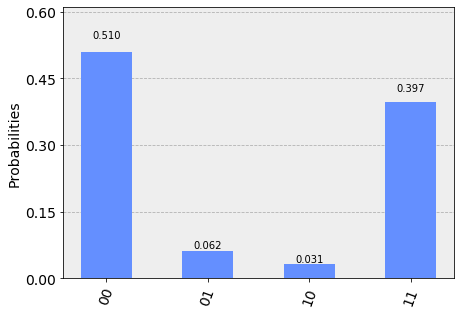

In [36]:
plot_histogram(melbourne_result.get_counts(bellZZ))

In [ ]:
The function below calculates the KL divergence between the ideal counts and the observed counts.

In [46]:
from scipy.special import xlogy

def kl_divergence_counts(ideal_counts, experiment_counts):
    kl_diverge = 0
    n_shots = sum(ideal_counts.values())
    for state in ideal_counts:
        ideal_count = ideal_counts[state]
        exp_count = experiment_counts.get(state, 0)
        kl_diverge -= xlogy(ideal_count/n_shots, exp_count/ideal_count)
    return kl_diverge

<span class="badge badge-primary">Exercise 2.4</span> Calculate how close this is to the ideal Bell state counts using the KL divergance as a metric. Does this tell us everything about the quantum state?



In [47]:
kl_divergence_counts(result.get_counts(bellZZ), melbourne_result.get_counts(bellZZ))

0.11269272959336073

<span class="badge badge-primary">Exercise 2.5</span> Plot the kl-divergence as a function of both number of gates and execution time, comparing single qubit and two qubit gates on the first two qubits. For the single qubit gates apply an `x` gate to each qubit. for the two qubit gates, apply `cx` gates with control qubit 1 and target qubit 0. Make sure to place barriers between each iteration of the circuit so that the transpiler does not optimize the `cx` to the identity. What do you see, and why do you think this might be happening on the device? Can you modify these experiments to extract device parameters?

<div class="alert alert-block alert-info">
<b>Note:</b> Use the gate times from the last notebook.
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> Provide an 'initial_layout' to 'execute' to specify which qubits the quantum registers will map to on the device.
</div>

In [70]:
cx_circs = []
cx_times = []
x_circs = []
x_times = []

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

cx_time = 678
x_time = 100

cx_circ = QuantumCircuit(qr, cr)
cx_circ.cx(qr[1], qr[0])
cx_circ.barrier()

x_circ = QuantumCircuit(qr, cr)
x_circ.x(qr)
x_circ.barrier()

measure_circ = QuantumCircuit(qr, cr)
measure_circ.measure(qr, cr)

new_cx_circ = cx_circ
new_x_circ = x_circ

gates = 10

for i in range(20):
    old_cx_circ = new_cx_circ
    new_cx_circ = old_cx_circ + cx_circ
    cx_times.append((i+1)*cx_time)
    cx_circs.append(old_cx_circ+measure_circ)

for i in range(int(np.ceil(gates*cx_time/x_time))):
    old_x_circ = new_x_circ
    new_x_circ = old_x_circ + x_circ
    x_times.append((i+1)*x_time)
    x_circs.append(old_x_circ+measure_circ)

In [79]:
cx_circs[-1].draw()

In [67]:
x_circs[-1].draw()

In [88]:
gate_times = [
    ('u1', None, 0), ('u2', None, 100), ('u3', None, 200),
    ('cx', [1, 0], 678), ('cx', [1, 2], 547), ('cx', [2, 3], 721),
    ('cx', [4, 3], 733), ('cx', [4, 10], 721), ('cx', [5, 4], 800),
    ('cx', [5, 6], 800), ('cx', [5, 9], 895), ('cx', [6, 8], 895),
    ('cx', [7, 8], 640), ('cx', [9, 8], 895), ('cx', [9, 10], 800),
    ('cx', [11, 10], 721), ('cx', [11, 3], 634), ('cx', [12, 2], 773),
    ('cx', [13, 1], 2286), ('cx', [13, 12], 1504), ('cx', [], 800)
]

properties = backend.properties()

configuration = backend.configuration()

noise_model = noise.device.basic_device_noise_model(properties, gate_times=gate_times)

In [72]:
cx_ideal_result = execute(cx_circs, backend_sim, initial_layout=list(range(14))).result()
cx_noisy_result = execute(cx_circs, backend_sim, initial_layout=list(range(14)), noise_model=noise_model,
                          coupling_map=configuration.coupling_map,
                          basis_gates=configuration.basis_gates).result()
cx_melbourne_result = execute(cx_circs, backend, initial_layout=list(range(14))).result()

In [71]:
x_ideal_result = execute(x_circs, backend_sim, initial_layout=list(range(14))).result()
x_noisy_result = execute(x_circs, backend_sim, initial_layout=list(range(14)), noise_model=noise_model,
                          coupling_map=configuration.coupling_map,
                          basis_gates=configuration.basis_gates).result()
x_melbourne_result = execute(x_circs, backend, initial_layout=list(range(14))).result()

In [97]:
cx_device_kl_divergences = []
cx_noisy_kl_divergences = []
for circ in cx_circs:
    cx_noisy_kl_divergences.append(kl_divergence_counts(cx_ideal_result.get_counts(circ), cx_noisy_result.get_counts(circ)))
    cx_device_kl_divergences.append(kl_divergence_counts(cx_ideal_result.get_counts(circ), cx_melbourne_result.get_counts(circ)))

In [98]:
x_device_kl_divergences = []
x_noisy_kl_divergences = []
for circ in x_circs:
    x_noisy_kl_divergences.append(kl_divergence_counts(x_ideal_result.get_counts(circ), x_noisy_result.get_counts(circ)))
    x_device_kl_divergences.append(kl_divergence_counts(x_ideal_result.get_counts(circ), x_melbourne_result.get_counts(circ)))

Text(0, 0.5, 'KL Divergence')

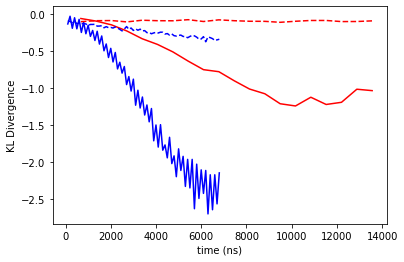

In [106]:
plt.plot(cx_times, np.asarray(cx_device_kl_divergences)*-1, label='cx', color='red')
plt.plot(x_times, np.asarray(x_device_kl_divergences)*-1, label='x', color='blue')
plt.plot(cx_times, np.asarray(cx_noisy_kl_divergences)*-1, label='cx', linestyle='--', color='red')
plt.plot(x_times, np.asarray(x_noisy_kl_divergences)*-1, label='x', linestyle='--', color='blue')
plt.xlabel('time (ns)')
plt.ylabel('KL Divergence')

Text(0, 0.5, 'KL Divergence')

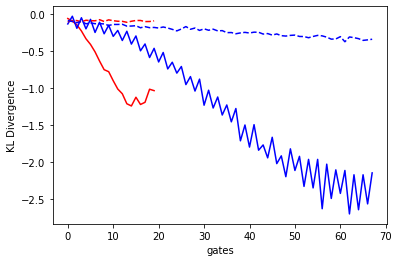

In [107]:
plt.plot(np.asarray(cx_device_kl_divergences)*-1, label='cx', color='red')
plt.plot(np.asarray(x_device_kl_divergences)*-1, label='x', color='blue')
plt.plot(np.asarray(cx_noisy_kl_divergences)*-1, label='cx', linestyle='--', color='red')
plt.plot(np.asarray(x_noisy_kl_divergences)*-1, label='x', linestyle='--', color='blue')
plt.xlabel('gates')
plt.ylabel('KL Divergence')

Here we only have access to the expectation values of the prepared state. We would have to do something more detailed such as quantum state tomography to learn the actually prepared quantum state.